In [3]:
!pip install librosa

     |████████████████████████████████| 203 kB 5.5 MB/s 
     |████████████████████████████████| 2.2 MB 5.8 MB/s 
     |████████████████████████████████| 613 kB 6.3 MB/s 
     |████████████████████████████████| 51 kB 2.7 MB/s 
     |████████████████████████████████| 323 kB 9.9 MB/s 
     |████████████████████████████████| 377 kB 10.2 MB/s 
     |████████████████████████████████| 18.5 MB 13.3 MB/s 
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23141 sha256=13ff0d6fc7c96279cafdaa9d3304275d54e94dd9899545dd3a236a51d955b2ef
  Stored in directory: /Users/leonardchoo/Library/Caches/pip/wheels/a2/a3/bd/ec1568ce7515115a11ab686d509ad302124c782af065de47ee
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=724e96dc3e6a5eb473319652a113904b674fe45f53980a1c944b87e4e5161086
  Stored in directory: /Users/leonardchoo/Library/Caches/pip/wheels/86/2c/7d/46a32a246b0e5939cea2c5ec1492164073e0c5d16d666ae2cd
Successfully built audioread resam

In [1]:
import librosa

# Load the audio file
AUDIO_FILE = '../data/210629HealthyData/1093-a_n.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

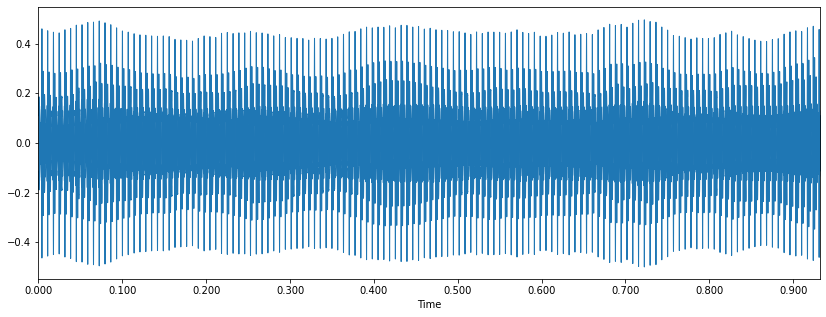

In [2]:
import librosa.display
import matplotlib.pyplot as plt

# x-axis has been converted to time using our sample rate. 
# matplotlib plt.plot(y), would output the same figure, but with sample number on the x-axis instead of seconds
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

In [3]:
from IPython.display import Audio
Audio(AUDIO_FILE)

In [5]:
print ('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print (samples[22400:22420])

Example shape  (46579,) Sample rate  50000 Data type <class 'numpy.ndarray'>
[ 0.02816772  0.02520752  0.02133179  0.01559448  0.00976562  0.00476074
 -0.00109863 -0.00854492 -0.01779175 -0.02670288 -0.03674316 -0.04837036
 -0.05984497 -0.06985474 -0.07977295 -0.0904541  -0.10162354 -0.11108398
 -0.11816406 -0.12640381]


/usr/local/lib/python3.9/site-packages/librosa/display.py:954: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(


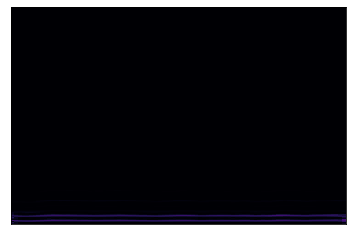

In [6]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

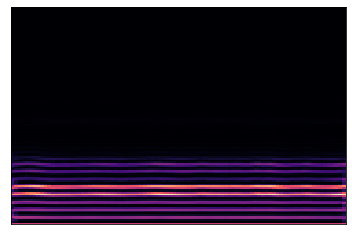

In [7]:
# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

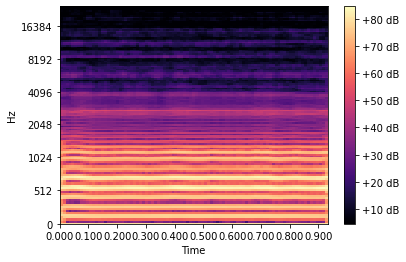

In [11]:
import numpy as np
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [13]:
#Spectrogram is a 2D numpy array
print(type(mel_sgram), mel_sgram.shape)
# <class 'numpy.ndarray'> (128, 134)

<class 'numpy.ndarray'> (128, 91)


MFCC is of type <class 'numpy.ndarray'> with shape (20, 91)


/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


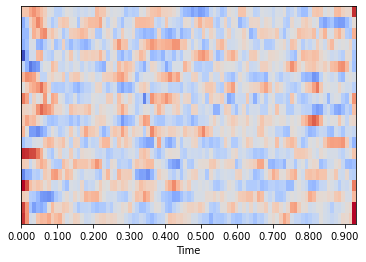

In [15]:
# MFCC
import sklearn
import librosa
import librosa.display

# load file
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
mfcc = librosa.feature.mfcc(samples, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print(f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')
# 20 rows (amplitude values of frequency bands), 91 columns (FFT time sections)